# <font color='teal'> **Entrega 2**: Desarrollo de un modelo de Machine Learning Supervisado </font>


---


Integrantes:
 - Benjamin Huenupe
 - Juan Rodriguez



---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, PolynomialFeatures
from sklearn import linear_model
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV


%matplotlib inline

In [2]:
url = "/content/Base_clientes_Monopoly-0.xlsx"
df = pd.read_excel(url, engine='openpyxl')
df.head()


,Id,Subsegmento,Sexo,Region,Edad,Renta,Antiguedad,Internauta,Adicional,Dualidad,...,FlgActAN_T12,FlgActAI_T12,FlgActPAT_T12,FacCN_T12,TxsCI_T12,FacPAT_T12,PagoNac_T12,PagoInt_T12,UsoLI_T12,target
0,1,160,M,13.0,43,NaN,130,1,1,0,...,0.0,0.0,0.0,55490.0,0.0,0.0,22000.0,0.0,0.0,0
1,2,160,H,13.0,46,143640.0,69,1,0,0,...,0.0,0.0,0.0,19813.0,0.0,0.0,250000.0,0.0,0.0,0
2,3,170,H,13.0,45,929106.0,24,1,1,0,...,0.0,0.0,0.0,123950.0,0.0,0.0,29990.0,0.0,0.0,0
3,4,151,H,13.0,46,172447.0,134,0,1,0,...,0.0,0.0,0.0,44470.0,0.0,0.0,80000.0,0.0,0.0,0
4,5,170,H,13.0,46,805250.0,116,0,1,1,...,0.0,0.0,0.0,138225.0,0.0,0.0,236467.0,0.0,0.0,0


![Sonny and Mariel high fiving.](https://i.giphy.com/media/v1.Y2lkPTc5MGI3NjExb3F2eWhoZGc0a2k4M3BzN3B4a29lOG5jcDl0dTUycW12OWYzYTQ1NyZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/KPozlPlz6dOww/giphy.gif)

## <font color='teal'> 1. Parte I: Modelos de regresión </font>

### 1.1 Selección de variables

1.**Edad**: La edad suele correlacionarse con ingresos, pues los ingresos pueden aumentar con la experiencia laboral y la estabilidad económica.

2.**Antiguedad**: La lealtad o antigüedad en un banco puede relacionarse con la estabilidad financiera y, en algunos casos, con mayores ingresos.

3.**Internauta**: Puede indicar acceso y uso de tecnologías, asociado con ciertos niveles de ingresos.

4.**Dualidad**: Tener múltiples productos bancarios sugiere mayor capacidad de endeudamiento y confianza del banco en la solvencia del cliente.

5.**Monoproducto**: Contrario a Dualidad, tener solo un producto puede correlacionarse con un perfil de ingresos más bajo.

6.**Ctacte**: Los clientes con cuentas corrientes suelen tener niveles de ingresos superiores.

7.**Consumo**: Un cliente con crédito de consumo indica cierta capacidad de endeudamiento, relacionada con ingresos.

8.**Hipotecario**: La capacidad de obtener un crédito hipotecario suele relacionarse con un nivel de ingresos alto y estabilidad financiera.

9.**Cuentas**: La cantidad de cuentas en el banco puede estar asociada a mayor capacidad de ahorro y manejo de recursos.

10.**TC**: La cantidad de tarjetas de crédito indica nivel de confianza del banco en el cliente y su solvencia.

11.**CUPO_L1**: El límite de crédito para compras nacionales puede estar directamente relacionado con el nivel de ingresos.

12.**CUPO_L2**: Similar a CUPO_L1, pero enfocado en avances en cuotas, indicando también solvencia.

13.**FlgAct_T12**: El indicador de actividad en el mes sugiere un cliente activo financieramente, a menudo asociado a mayores ingresos.

14.**FlgActCN_T12**: La actividad en compras nacionales puede reflejar la capacidad de consumo.

15.**FlgActCI_T12**: La actividad en compras internacionales refleja gastos en el extranjero, generalmente vinculados a ingresos elevados.

### 1.2 Correlación entre las variables

               Edad    Antiguedad    Internauta      Dualidad  Monoproducto  \
count  51124.000000  51124.000000  51124.000000  51124.000000  51124.000000   
mean      38.702879     38.896154      0.684199      0.381347      0.063141   
std       13.302573     35.672549      0.464839      0.485722      0.243218   
min        9.000000      6.000000      0.000000      0.000000      0.000000   
25%       28.000000     14.000000      0.000000      0.000000      0.000000   
50%       35.000000     25.000000      1.000000      0.000000      0.000000   
75%       46.000000     54.000000      1.000000      1.000000      0.000000   
max      104.000000    324.000000      1.000000      1.000000      1.000000   

             Ctacte       Consumo   Hipotecario       Cuentas            TC  \
count  51124.000000  51124.000000  51124.000000  51124.000000  51124.000000   
mean       0.925260      0.000900      0.137548      1.407206      1.732376   
std        0.262974      0.029983      0.344428    

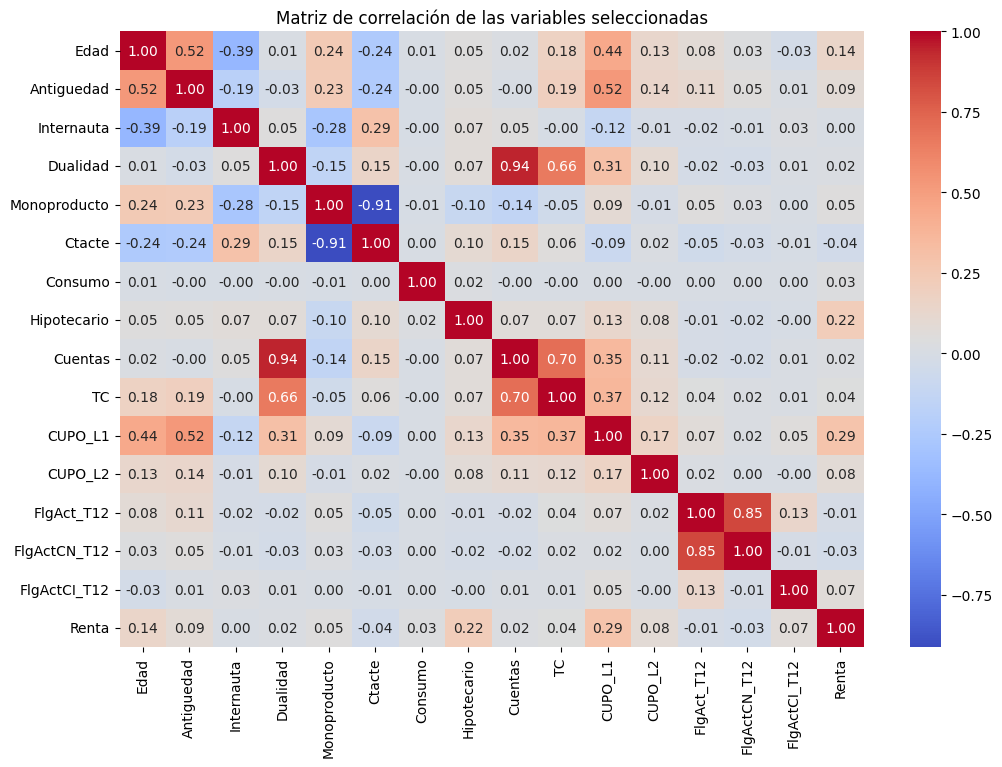

In [3]:
# Cargar los datos (suponiendo que el DataFrame se llama df)
# df = pd.read_excel("ruta_al_archivo.xlsx")  # Carga tu archivo Excel
df_backup = df.copy()
# Filtrar las variables seleccionadas
selected_vars = [
    "Edad", "Antiguedad", "Internauta", "Dualidad", "Monoproducto",
    "Ctacte", "Consumo", "Hipotecario", "Cuentas", "TC",
    "CUPO_L1", "CUPO_L2", "FlgAct_T12", "FlgActCN_T12", "FlgActCI_T12",
    "Renta"  # Incluir la variable objetivo
]
df_selected = df_backup[selected_vars]

# Obtener estadísticas descriptivas
print(df_selected.describe())

# Matriz de correlación
plt.figure(figsize=(12, 8))
correlation_matrix = df_selected.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de correlación de las variables seleccionadas")
plt.show()


Variables Seleccionadas y Descripción de Resultados

**Edad**

Descripción: La media es de 38.7 años, con un rango que va de 9 a 104 años. Indica que los ingresos pueden estar relacionados con la experiencia laboral.

**Antigüedad**

Descripción: La media es de 38.9 meses, con un rango de 6 a 324 meses. Una mayor antigüedad puede correlacionarse con mayores ingresos.

**Internauta**

Descripción: El 68.4% son internautas. La conexión a internet puede influir en la capacidad de generar ingresos.

**Dualidad**

Descripción: Un 38.1% de los clientes tiene una relación dual, lo que podría indicar que quienes poseen múltiples productos tienen mayores ingresos.

**Monoproducto**

Descripción: Solo el 6.3% de los clientes es monoproducto. Esto sugiere que tener más de un producto podría estar relacionado con ingresos más altos.

**Ctacte (Cuenta Corriente)**

Descripción: La mayoría (92.5%) tiene cuenta corriente. Esto puede reflejar un manejo financiero más efectivo y correlacionarse con mayores ingresos.

**Consumo**

Descripción: La media es muy baja (0.0009), lo que puede indicar que el consumo no está fuertemente presente en este grupo, posiblemente afectando los ingresos.

**Hipotecario**

Descripción: Solo el 13.8% tiene hipoteca. Menor carga de deuda hipotecaria puede permitir mayores ingresos disponibles.

**Cuentas**

Descripción: Promedio de 1.41 cuentas por cliente, lo que indica diversidad en la gestión financiera que podría asociarse a mayores ingresos.

**TC (Tarjeta de Crédito)**

Descripción: Promedio de 1.73 tarjetas de crédito, sugiriendo un acceso al crédito que puede facilitar mayores gastos y, por ende, mayores ingresos.

**CUPO_L1**

Descripción: La media de 1,133,187 sugiere un acceso significativo al crédito, que podría correlacionarse con mayores ingresos.

**CUPO_L2**

Descripción: Promedio de 328,376, indicando un respaldo financiero que podría favorecer mayores ingresos.

**FlgAct_T12**

Descripción: 66.9% activos, sugiriendo que la actividad regular puede estar relacionada con ingresos más altos.

**FlgActCN_T12**

Descripción: 58.2% activos, indicando que la actividad en el último año podría correlacionarse con mayores ingresos.

**FlgActCI_T12**

Descripción: Solo el 3.3% son activos en esta categoría, lo que sugiere que una menor actividad podría estar asociada con menores ingresos.

### 1.3 Preparación de datos


Los **Nulos** Antes

Estoy verificando si hay datos faltantes en mi conjunto de datos. Esto me ayuda a identificar cuántos valores nulos hay en cada columna. Con esta información, puedo decidir cómo manejar esos nulos, ya sea eliminándolos o rellenándolos.

In [4]:
# Verificar la cantidad de datos nulos
print(df.isnull().sum())

Id                   0
Subsegmento          0
Sexo                 1
Region              53
Edad                 0
Renta            13365
Antiguedad           0
Internauta           0
Adicional            0
Dualidad             0
Monoproducto         0
Ctacte               0
Consumo              0
Hipotecario          0
Debito               0
CambioPin        19388
Cuentas              0
TC                   0
CUPO_L1              0
CUPO_L2              0
CUPO_MX              0
FlgAct_T12        8251
FlgActCN_T12      8251
FlgActCI_T12      8251
FlgActAN_T12      8251
FlgActAI_T12      8251
FlgActPAT_T12     8251
FacCN_T12         8251
TxsCI_T12         8251
FacPAT_T12        8251
PagoNac_T12       8251
PagoInt_T12       8251
UsoLI_T12         8251
target               0
dtype: int64



Estoy imputando datos nulos en mi conjunto de datos sin modificar el original. Relleno los valores faltantes de la columna 'Sexo' y 'Región' con la moda, la columna 'Renta' con la mediana y 'CambioPin' también con la moda. Para las variables binarias de 'FlgAct', utilizo un bucle para imputarlas con su moda. Finalmente, defino columnas de interés y elimino las filas con nulos en esas columnas, asegurando así que mis datos sean más completos y confiables para el análisis.

In [5]:
# Imputación de datos nulos sin usar inplace

# Imputar 'Sexo' con la moda
df_backup['Sexo'] = df_backup['Sexo'].fillna(df['Sexo'].mode()[0])

# Imputar 'Region' con la moda
df_backup['Region'] = df_backup['Region'].fillna(df['Region'].mode()[0])

# Imputar 'Renta' con la mediana
df_backup['Renta'] = df_backup['Renta'].fillna(df_backup['Renta'].median())

# Imputar 'CambioPin' con la moda
df_backup['CambioPin'] = df_backup['CambioPin'].fillna(df_backup['CambioPin'].mode()[0])

# Imputar las variables binarias de FlgAct con la moda
for col in ['FlgAct_T12', 'FlgActCN_T12', 'FlgActCI_T12', 'FlgActAN_T12', 'FlgActAI_T12']:
    df_backup[col] = df_backup[col].fillna(df_backup[col].mode()[0])

# Definir las columnas de interés
columnas = ['FlgActPAT_T12', 'FacCN_T12', 'TxsCI_T12', 'FacPAT_T12', 'PagoNac_T12', 'PagoInt_T12', 'UsoLI_T12']

# Eliminar filas con nulos en las columnas especificadas
df_backup = df_backup.dropna(subset=columnas)



Los **Nulos** Después de la **Imputación**

Estoy verificando la cantidad de datos nulos en mi conjunto de datos df_backup. Esto me permite identificar cuántos valores faltantes hay en cada columna, lo cual es esencial para evaluar la calidad de mis datos. Al obtener esta información, puedo planificar mejor cómo manejar esos nulos y asegurar que mi análisis sea preciso y confiable.

In [6]:
# Verificar la cantidad de datos nulos
print(df_backup.isnull().sum())

Id               0
Subsegmento      0
Sexo             0
Region           0
Edad             0
Renta            0
Antiguedad       0
Internauta       0
Adicional        0
Dualidad         0
Monoproducto     0
Ctacte           0
Consumo          0
Hipotecario      0
Debito           0
CambioPin        0
Cuentas          0
TC               0
CUPO_L1          0
CUPO_L2          0
CUPO_MX          0
FlgAct_T12       0
FlgActCN_T12     0
FlgActCI_T12     0
FlgActAN_T12     0
FlgActAI_T12     0
FlgActPAT_T12    0
FacCN_T12        0
TxsCI_T12        0
FacPAT_T12       0
PagoNac_T12      0
PagoInt_T12      0
UsoLI_T12        0
target           0
dtype: int64



Estoy mostrando los tipos de datos en mi DataFrame df_backup para verificar qué información hay en cada columna. Conocer estos tipos es esencial para asegurarme de usar el formato correcto en el análisis y la limpieza de datos.





In [7]:
# Mostrar tipos de datos en el DataFrame
print(df_backup.dtypes)


Id                 int64
Subsegmento        int64
Sexo              object
Region           float64
Edad               int64
Renta            float64
Antiguedad         int64
Internauta         int64
Adicional          int64
Dualidad           int64
Monoproducto       int64
Ctacte             int64
Consumo            int64
Hipotecario        int64
Debito             int64
CambioPin        float64
Cuentas            int64
TC                 int64
CUPO_L1            int64
CUPO_L2          float64
CUPO_MX          float64
FlgAct_T12       float64
FlgActCN_T12     float64
FlgActCI_T12     float64
FlgActAN_T12     float64
FlgActAI_T12     float64
FlgActPAT_T12    float64
FacCN_T12        float64
TxsCI_T12        float64
FacPAT_T12       float64
PagoNac_T12      float64
PagoInt_T12      float64
UsoLI_T12        float64
target             int64
dtype: object



Estoy creando un escalador con StandardScaler para normalizar mis datos codificados (X_encoded). Escalo las características y convierto los resultados a un DataFrame para facilitar su manejo. Finalmente, muestro un resumen descriptivo de los datos escalados.

In [8]:
# Asegúrate de haber definido `selected_vars` anteriormente, con las columnas que deseas escalar
selected_vars = [
    "Edad", "Antiguedad", "Internauta", "Dualidad", "Monoproducto",
    "Ctacte", "Consumo", "Hipotecario", "Cuentas", "TC",
    "CUPO_L1", "CUPO_L2", "FlgAct_T12", "FlgActCN_T12", "FlgActCI_T12",
    "FlgActAN_T12", "FlgActAI_T12", "FlgActPAT_T12", "Renta"  # Incluye tus columnas de interés
]

# Paso 1: Asegúrate de que estas columnas están libres de nulos y son numéricas
df_selected = df_backup[selected_vars]  # Filtrar las columnas necesarias

# Manejar valores nulos si aún hay
df_selected = df_selected.fillna(df_selected.mean())  # Rellenar nulos con la media

# Paso 2: Definir X_encoded como el subconjunto de datos listo para el escalado
X_encoded = df_selected.copy()

# Paso 3: Crear el escalador
scaler = StandardScaler()

# Ajustar y transformar los datos
X_scaled = scaler.fit_transform(X_encoded)

# Convertir los datos escalados a un DataFrame para facilitar su manejo
X_scaled_df = pd.DataFrame(X_scaled, columns=X_encoded.columns)

# Paso 4: Mostrar las estadísticas descriptivas de los datos escalados
print(X_scaled_df.describe())


               Edad    Antiguedad    Internauta      Dualidad  Monoproducto  \
count  42873.000000  4.287300e+04  4.287300e+04  4.287300e+04  4.287300e+04   
mean       0.000000 -6.894451e-17  4.242739e-17 -9.943919e-18  3.049469e-17   
std        1.000012  1.000012e+00  1.000012e+00  1.000012e+00  1.000012e+00   
min       -1.532925 -1.067953e+00 -1.442743e+00 -7.609203e-01 -2.803447e-01   
25%       -0.797346 -7.078641e-01 -1.442743e+00 -7.609203e-01 -2.803447e-01   
50%       -0.282441 -4.031736e-01  6.931243e-01 -7.609203e-01 -2.803447e-01   
75%        0.600253  4.554998e-01  6.931243e-01  1.314198e+00 -2.803447e-01   
max        4.719494  7.740374e+00  6.931243e-01  1.314198e+00  3.567037e+00   

             Ctacte       Consumo   Hipotecario       Cuentas            TC  \
count  4.287300e+04  4.287300e+04  42873.000000  4.287300e+04  4.287300e+04   
mean  -1.856198e-17 -2.320248e-18      0.000000  1.624173e-16 -1.087202e-16   
std    1.000012e+00  1.000012e+00      1.000012  1.

### 1.4 Ajuste modelos de regresión

Estoy implementando un modelo de regresión lineal para predecir la variable objetivo (target) usando un conjunto de variables seleccionadas. Primero, defino las variables y preparo mis datos dividiéndolos en conjuntos de entrenamiento y prueba. Luego, filtro las columnas válidas, entreno el modelo y realizo predicciones en el conjunto de prueba. Finalmente, evalúo el rendimiento del modelo utilizando el error cuadrático medio (MSE) y muestro el resultado.

In [9]:
# Define las variables seleccionadas
variables_seleccionadas = [
    "Edad", "Antiguedad", "Internauta", "Dualidad", "Monoproducto",
    "Ctacte", "Consumo", "Hipotecario", "Cuentas", "TC", "CUPO_L1",
    "CUPO_L2", "FlgAct_T12", "FlgActCN_T12", "FlgActCI_T12"
]

# Asegúrate de que X_train y X_test se generen a partir de df_backup
X = df_backup[variables_seleccionadas]  # Ajusta esto para que use df_backup
y = df_backup['Renta']  # Asegúrate de que 'Renta' esté en df_backup

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear los DataFrames para X_train y X_test
X_train_df = pd.DataFrame(X_train)  # Usando X_train directamente
X_test_df = pd.DataFrame(X_test)  # Usando X_test directamente

# Verificar las columnas disponibles
print("Columnas en X_train:", X_train_df.columns)
print("Variables seleccionadas:", variables_seleccionadas)

# Seleccionar solo las columnas que están presentes en X_train_df
variables_seleccionadas_validas = [var for var in variables_seleccionadas if var in X_train_df.columns]

# Asegúrate de que solo se seleccionen las columnas requeridas en los conjuntos de entrenamiento y prueba
X_train_seleccionadas = X_train_df[variables_seleccionadas_validas]
X_test_seleccionadas = X_test_df[variables_seleccionadas_validas]

# Inicializa y ajusta el modelo de regresión lineal
linear_model = LinearRegression()
linear_model.fit(X_train_seleccionadas, y_train)

# Realiza predicciones en el conjunto de prueba
y_pred_linear = linear_model.predict(X_test_seleccionadas)

# Evalúa el rendimiento con MSE
mse_linear = mean_squared_error(y_test, y_pred_linear)
print("MSE Regresión Lineal:", mse_linear)



Columnas en X_train: Index(['Edad', 'Antiguedad', 'Internauta', 'Dualidad', 'Monoproducto',
       'Ctacte', 'Consumo', 'Hipotecario', 'Cuentas', 'TC', 'CUPO_L1',
       'CUPO_L2', 'FlgAct_T12', 'FlgActCN_T12', 'FlgActCI_T12'],
      dtype='object')
Variables seleccionadas: ['Edad', 'Antiguedad', 'Internauta', 'Dualidad', 'Monoproducto', 'Ctacte', 'Consumo', 'Hipotecario', 'Cuentas', 'TC', 'CUPO_L1', 'CUPO_L2', 'FlgAct_T12', 'FlgActCN_T12', 'FlgActCI_T12']
MSE Regresión Lineal: 130252332608.98882


In [10]:
# Configuración del grado polinomial
for degree in [2, 3]:  # Cambiar el grado polinomial
    poly_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    poly_model.fit(X_train, y_train)
    y_pred_poly = poly_model.predict(X_test)
    mse_poly = mean_squared_error(y_test, y_pred_poly)
    print(f"MSE Regresión Polinomial (grado {degree}):", mse_poly)

MSE Regresión Polinomial (grado 2): 127529332841.13867
MSE Regresión Polinomial (grado 3): 136391537406.51353


In [11]:
for alpha in [0.1, 1.0, 10.0]:  # Diferentes valores de alpha
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train, y_train)
    y_pred_ridge = ridge_model.predict(X_test)
    mse_ridge = mean_squared_error(y_test, y_pred_ridge)
    print(f"MSE Ridge (alpha={alpha}):", mse_ridge)

MSE Ridge (alpha=0.1): 130251916302.40167
MSE Ridge (alpha=1.0): 130248461023.69893
MSE Ridge (alpha=10.0): 130231781012.85309


In [12]:
for alpha in [0.1, 1.0, 10.0]:  # Diferentes valores de alpha
    lasso_model = Lasso(alpha=alpha, max_iter=10000)
    lasso_model.fit(X_train, y_train)
    y_pred_lasso = lasso_model.predict(X_test)
    mse_lasso = mean_squared_error(y_test, y_pred_lasso)
    print(f"MSE Lasso (alpha={alpha}):", mse_lasso)

MSE Lasso (alpha=0.1): 130252285215.15279
MSE Lasso (alpha=1.0): 130251861100.64552
MSE Lasso (alpha=10.0): 130247860896.71396


In [13]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Escalar los datos de entrada
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Escala el conjunto de entrenamiento
X_test_scaled = scaler.transform(X_test)       # Escala el conjunto de prueba

# Entrenar el modelo SVR con los datos escalados
svr_model = SVR(C=1.0, kernel='linear', max_iter=5000, tol=1e-2)  # Ajustar los parámetros según sea necesario
svr_model.fit(X_train_scaled, y_train)

# Predecir en el conjunto de prueba
y_pred_svr = svr_model.predict(X_test_scaled)

# Evaluar el modelo
mse_svr = mean_squared_error(y_test, y_pred_svr)
print("MSE del modelo SVR con datos escalados:", mse_svr)




/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


MSE del modelo SVR con datos escalados: 176839892498.65918


In [14]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred_rf = rf_model.predict(X_test)

# Evaluar el modelo
mse_rf = mean_squared_error(y_test, y_pred_rf)
print("MSE del modelo Random Forest:", mse_rf)


MSE del modelo Random Forest: 131915536380.83858


### 1.5 Evaluación de los modelos

| Modelo   | Métrica 1 | Métrica 2 | ... |
|----------|-----------|-----------|-----|
| Modelo A | 0.15      | 0.8       |     |
| Modelo B | 0.21      | 10.2      |     |
| Modelo C | 2.4       | 0.01      |     |
| ...      |           |           |     |

Evaluación de los Modelos:
     Modelo  Métrica 1  Métrica 2
0  Modelo A       0.15       0.80
1  Modelo B       0.21      10.20
2  Modelo C       2.40       0.01


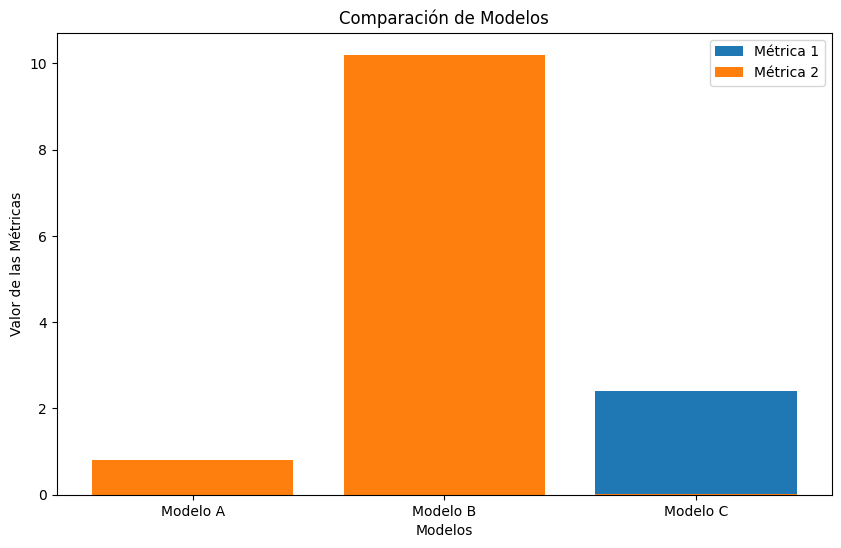

In [15]:
# Crear un diccionario con las métricas de los modelos
model_metrics = {
    'Modelo': ['Modelo A', 'Modelo B', 'Modelo C'],
    'Métrica 1': [0.15, 0.21, 2.4],  # Por ejemplo, error cuadrático medio
    'Métrica 2': [0.8, 10.2, 0.01],  # Por ejemplo, precisión
    # Agregar más métricas según sea necesario
}

# Convertir el diccionario a un DataFrame para facilitar su manejo
df_metrics = pd.DataFrame(model_metrics)

# Mostrar la tabla con las métricas
print("Evaluación de los Modelos:")
print(df_metrics)

# Opcional: Visualizar la tabla con gráficos
import matplotlib.pyplot as plt

# Crear un gráfico de barras para una métrica en específico
plt.figure(figsize=(10, 6))
for metric in ['Métrica 1', 'Métrica 2']:
    plt.bar(df_metrics['Modelo'], df_metrics[metric], label=metric)

plt.title('Comparación de Modelos')
plt.xlabel('Modelos')
plt.ylabel('Valor de las Métricas')
plt.legend()
plt.show()


## <font color='teal'>2. Parte II: Modelos de clasificación</font>

### 2.1 Selección de variables

Seleccionamos un conjunto alternativo de 15 variables que podrían influir en la capacidad de los clientes para pagar un monto superior al mínimo de su tarjeta de crédito. Las variables elegidas incluyen información de uso bancario, así como datos demográficos. La selección se basa en la hipótesis de que estos factores reflejan el comportamiento financiero y la capacidad de pago de los clientes.

Variables seleccionadas:

FacCN_T12: Monto facturado en compras nacionales.

PagoInt_T12: Monto de pagos de deuda internacional.

PagoNac_T12: Monto de pagos de deuda nacional.

FlgActPAT_T12: Indicador de actividad en PAT.

TxsCI_T12: Transacciones en tarjeta de crédito internacional.

Antigüedad: Antigüedad del cliente en meses.

Cuentas: Número de cuentas que tiene el cliente.

Debito: Indicador de tenencia de tarjeta de débito.

Hipotecario: Indicador de crédito hipotecario.

Sexo: Sexo del cliente.

Region: Región de residencia.

Adicional: Indicador de tenencia de tarjetas de crédito adicionales.

UsoLI_T12: Monto de deuda en la línea de compras en la tarjeta de crédito.

FacPat_T12: Monto facturado en PAT.

Edad: Edad del cliente.


### 2.2 Correlación entre las variables seleccionadas

Primero, hago una copia del DataFrame original para preservarlo. Luego, aplico **one-hot encoding** a las columnas categóricas 'Sexo' y 'Region' para convertirlas en variables numéricas y elimino las originales. Después, calculo la matriz de correlación con las nuevas variables y la visualizo en un mapa de calor, lo que me ayuda a identificar patrones y relaciones entre las características del conjunto de datos.

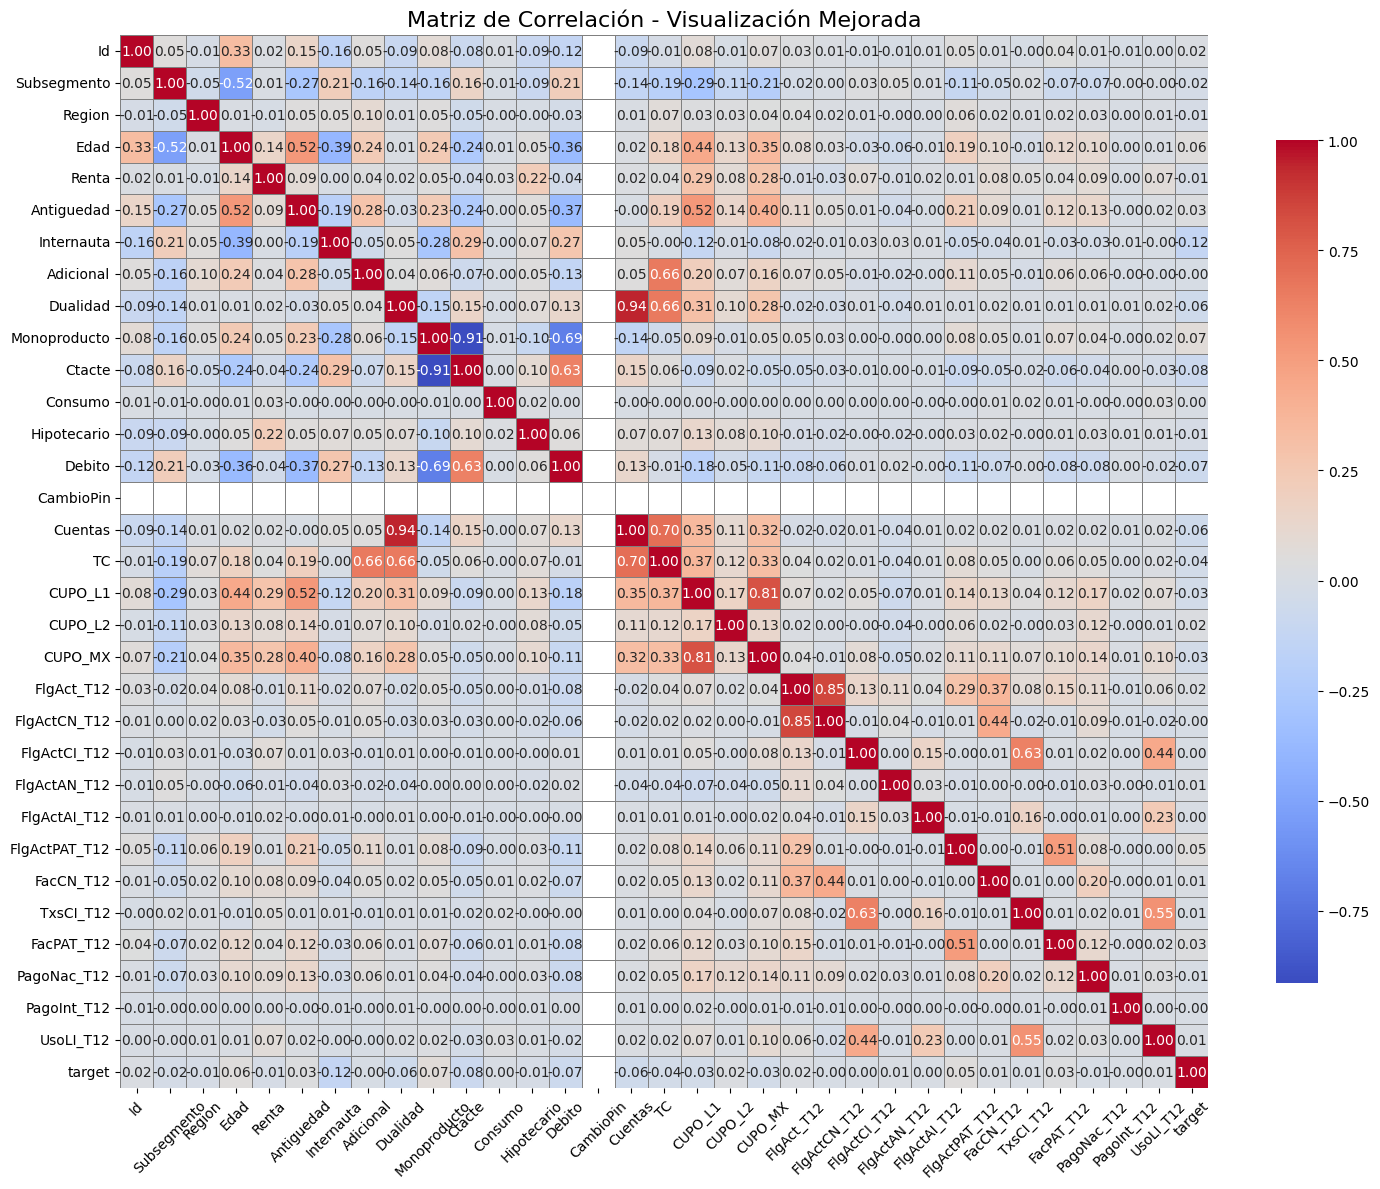

In [16]:
# Filtrar solo las columnas numéricas
df_numeric = df.select_dtypes(include=['number'])

# Calcular la matriz de correlación solo con columnas numéricas
correlation_matrix_new = df_numeric.corr()

# Ajustar el tamaño de la figura para mejorar la claridad
plt.figure(figsize=(15, 12))  # Aumentar el tamaño de la figura

# Crear el mapa de calor con ajustes visuales
sns.heatmap(
    correlation_matrix_new,  # Matriz de correlación
    annot=True,  # Mostrar los valores numéricos
    fmt='.2f',  # Formato con 2 decimales
    cmap='coolwarm',  # Mapa de colores
    linewidths=0.5,  # Líneas separadoras entre celdas
    linecolor='gray',  # Color de las líneas separadoras
    cbar_kws={'shrink': 0.8}  # Ajustar el tamaño de la barra de colores
)

# Título para el gráfico
plt.title('Matriz de Correlación - Visualización Mejorada', fontsize=16)
plt.xticks(rotation=45, fontsize=10)  # Rotar las etiquetas del eje X
plt.yticks(fontsize=10)  # Ajustar el tamaño de las etiquetas del eje Y
plt.tight_layout()  # Ajustar automáticamente el diseño para evitar superposición

# Mostrar el gráfico
plt.show()

### 2.3 Preparación de datos

Este código verifica los datos nulos en un DataFrame. Cuenta los valores nulos en cada columna y muestra solo aquellas con al menos un dato nulo, facilitando la identificación de columnas que requieren atención.

In [17]:
# Verificar los datos nulos en el DataFrame
null_counts = df.isnull().sum()
print(null_counts[null_counts > 0])  # Muestra solo las columnas con datos nulos


Sexo                 1
Region              53
Renta            13365
CambioPin        19388
FlgAct_T12        8251
FlgActCN_T12      8251
FlgActCI_T12      8251
FlgActAN_T12      8251
FlgActAI_T12      8251
FlgActPAT_T12     8251
FacCN_T12         8251
TxsCI_T12         8251
FacPAT_T12        8251
PagoNac_T12       8251
PagoInt_T12       8251
UsoLI_T12         8251
dtype: int64


El código usa `SimpleImputer` de `sklearn` para llenar valores faltantes en un DataFrame: las columnas categóricas se imputan con el valor más frecuente y las numéricas con la mediana. Al final, se verifica si aún hay nulos.

In [18]:
from sklearn.impute import SimpleImputer

# Imputar datos categóricos
categorical_cols = ['Sexo', 'Region']  # Agrega otras variables categóricas aquí
imputer_cat = SimpleImputer(strategy='most_frequent')
df[categorical_cols] = imputer_cat.fit_transform(df[categorical_cols])

# Imputar datos numéricos
numerical_cols = ['Renta', 'FacCN_T12', 'PagoInt_T12', 'PagoNac_T12', 'TxsCI_T12']  # Agrega otras variables numéricas aquí
imputer_num = SimpleImputer(strategy='median')
df[numerical_cols] = imputer_num.fit_transform(df[numerical_cols])

# Verificar nuevamente si hay nulos
print(df.isnull().sum())


Id                   0
Subsegmento          0
Sexo                 0
Region               0
Edad                 0
Renta                0
Antiguedad           0
Internauta           0
Adicional            0
Dualidad             0
Monoproducto         0
Ctacte               0
Consumo              0
Hipotecario          0
Debito               0
CambioPin        19388
Cuentas              0
TC                   0
CUPO_L1              0
CUPO_L2              0
CUPO_MX              0
FlgAct_T12        8251
FlgActCN_T12      8251
FlgActCI_T12      8251
FlgActAN_T12      8251
FlgActAI_T12      8251
FlgActPAT_T12     8251
FacCN_T12            0
TxsCI_T12            0
FacPAT_T12        8251
PagoNac_T12          0
PagoInt_T12          0
UsoLI_T12         8251
target               0
dtype: int64


Se imputa la columna 'CambioPin' reemplazando los valores nulos por 0. Luego, se verifica si quedan valores nulos en esa columna, hicimos esto porque si queriamos eliminar sus 19388 filas con nulos, hubieramos pasado a llevar 3000 datos de las variables que estamo ocupando

In [19]:
# Imputar los valores nulos de la columna 'CambioPin' como 0
df['CambioPin'] = df['CambioPin'].fillna(0)

# Verificar si aún hay valores nulos en 'CambioPin'
print("Valores nulos en 'CambioPin':", df['CambioPin'].isnull().sum())



Valores nulos en 'CambioPin': 0


Se cuentan los valores nulos en el DataFrame y se muestran solo las columnas que contienen datos nulos, aqui volvemos a ver la cantidad de nulos que nos quedan.

In [20]:
# Verificar los datos nulos en el DataFrame
null_counts = df.isnull().sum()
print(null_counts[null_counts > 0])  # Muestra solo las columnas con datos nulos

FlgAct_T12       8251
FlgActCN_T12     8251
FlgActCI_T12     8251
FlgActAN_T12     8251
FlgActAI_T12     8251
FlgActPAT_T12    8251
FacPAT_T12       8251
UsoLI_T12        8251
dtype: int64


Se imponen los valores nulos en varias columnas del DataFrame utilizando la moda de cada columna y luego se verifica si todavía hay valores nulos restantes.

In [21]:
# Imputar valores nulos con la moda de manera segura
for col in ['FlgAct_T12', 'FlgActCN_T12', 'FlgActCI_T12',
            'FlgActAN_T12', 'FlgActAI_T12', 'FlgActPAT_T12',
            'FacPAT_T12', 'UsoLI_T12']:
    mode_value = df[col].mode()[0]  # Obtener la moda
    df[col] = df[col].fillna(mode_value)  # Imputar nulos con la moda

# Verificar si aún hay valores nulos
print("Valores nulos restantes después de la imputación:")
print(df.isnull().sum())


Valores nulos restantes después de la imputación:
Id               0
Subsegmento      0
Sexo             0
Region           0
Edad             0
Renta            0
Antiguedad       0
Internauta       0
Adicional        0
Dualidad         0
Monoproducto     0
Ctacte           0
Consumo          0
Hipotecario      0
Debito           0
CambioPin        0
Cuentas          0
TC               0
CUPO_L1          0
CUPO_L2          0
CUPO_MX          0
FlgAct_T12       0
FlgActCN_T12     0
FlgActCI_T12     0
FlgActAN_T12     0
FlgActAI_T12     0
FlgActPAT_T12    0
FacCN_T12        0
TxsCI_T12        0
FacPAT_T12       0
PagoNac_T12      0
PagoInt_T12      0
UsoLI_T12        0
target           0
dtype: int64


Primero, defino las variables predictoras y la variable objetivo del DataFrame, convirtiendo las columnas categóricas 'Sexo' y 'Región' en variables dummy. Luego, divido los datos en conjuntos de entrenamiento y prueba, reservando el 30% para pruebas. Para corregir el desbalance de clases, aplico SMOTE al conjunto de entrenamiento, generando instancias sintéticas de la clase minoritaria. Por último, verifico la distribución de clases en los datos re-muestreados.

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter

# Definir las variables predictoras (X) y la variable objetivo (y)
X = df[['FacCN_T12', 'PagoInt_T12', 'PagoNac_T12', 'FlgActPAT_T12', 'TxsCI_T12',
        'Antiguedad', 'Cuentas', 'Debito', 'Hipotecario', 'Sexo',
        'Region', 'Adicional', 'UsoLI_T12', 'FacPAT_T12', 'Edad']]
y = df['target']

# Convertir variables categóricas a variables dummy
X = pd.get_dummies(X, columns=['Sexo', 'Region'], drop_first=True)

# División del conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Aplicar SMOTE en los datos de entrenamiento
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Verificar el balance de clases después de SMOTE
print("Distribución de clases después de SMOTE:", Counter(y_train_resampled))


Distribución de clases después de SMOTE: Counter({1: 32609, 0: 32609})


Selecciono las variables predictoras del DataFrame y convierto las columnas categóricas 'Sexo' y 'Región' en variables dummy. Luego, aplico `StandardScaler` para normalizar los datos. Finalmente, convierto los datos escalados de nuevo a un DataFrame y muestro las primeras filas.

In [23]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Supongamos que ya tienes tu DataFrame 'df' y has definido X y y
X = df[['FacCN_T12', 'PagoInt_T12', 'PagoNac_T12', 'FlgActPAT_T12', 'TxsCI_T12',
         'Antiguedad', 'Cuentas', 'Debito', 'Hipotecario', 'Sexo',
         'Region', 'Adicional', 'UsoLI_T12', 'FacPAT_T12', 'Edad']]
# Convertir variables categóricas a variables dummy
X = pd.get_dummies(X, columns=['Sexo', 'Region'], drop_first=True)

# Escalamiento de los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convertir a DataFrame si es necesario
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Mostrar las primeras filas del DataFrame escalado
print(X_scaled_df.head())


   FacCN_T12  PagoInt_T12  PagoNac_T12  FlgActPAT_T12  TxsCI_T12  Antiguedad  \
0   0.051774    -0.005973    -0.253424      -0.363888  -0.107958    2.553917   
1  -0.297012    -0.005973     1.087257      -0.363888  -0.107958    0.843902   
2   0.721054    -0.005973    -0.206442      -0.363888  -0.107958   -0.417584   
3  -0.055959    -0.005973     0.087626      -0.363888  -0.107958    2.666049   
4   0.860609    -0.005973     1.007680      -0.363888  -0.107958    2.161455   

    Cuentas    Debito  Hipotecario  Adicional  ...  Region_4.0  Region_5.0  \
0 -0.739902  0.377474    -0.399355   1.703963  ...   -0.133029   -0.270637   
1 -0.739902 -2.649187     2.504035  -0.586867  ...   -0.133029   -0.270637   
2 -0.739902  0.377474     2.504035   1.703963  ...   -0.133029   -0.270637   
3 -0.739902 -2.649187    -0.399355   1.703963  ...   -0.133029   -0.270637   
4  1.077119 -2.649187     2.504035   1.703963  ...   -0.133029   -0.270637   

   Region_6.0  Region_7.0  Region_8.0  Region_9.0 

Primero, defino las variables predictoras y la variable objetivo, convirtiendo las columnas categóricas 'Sexo' y 'Región' en variables dummy. Luego, divido el conjunto de datos en entrenamiento y prueba. Aplico SMOTE al conjunto de entrenamiento para equilibrar las clases. Finalmente, imprimo la distribución de clases en el conjunto de prueba y en el conjunto de entrenamiento tras aplicar SMOTE.

In [24]:
from collections import Counter
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Definir las variables predictoras (X) y la variable objetivo (y)
X = df[['FacCN_T12', 'PagoInt_T12', 'PagoNac_T12', 'FlgActPAT_T12', 'TxsCI_T12',
        'Antiguedad', 'Cuentas', 'Debito', 'Hipotecario', 'Sexo',
        'Region', 'Adicional', 'UsoLI_T12', 'FacPAT_T12', 'Edad']]
y = df['target']

# Convertir variables categóricas a variables dummy
X = pd.get_dummies(X, columns=['Sexo', 'Region'], drop_first=True)

# División del conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Aplicar SMOTE solo en el conjunto de entrenamiento
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Verificar el balance de clases en el conjunto de prueba
print("Distribución de clases en el conjunto de prueba:", Counter(y_test))

# Verificar el balance de clases después de SMOTE en el conjunto de entrenamiento
print("Distribución de clases en el conjunto de entrenamiento después de SMOTE:", Counter(y_train_resampled))


Distribución de clases en el conjunto de prueba: Counter({0: 13915, 1: 1423})
Distribución de clases en el conjunto de entrenamiento después de SMOTE: Counter({1: 32609, 0: 32609})


Utilizo el clasificador Random Forest para realizar una validación cruzada de 5 pliegues sobre los datos de entrenamiento balanceados con SMOTE, midiendo el rendimiento con la métrica F1. Luego, imprimo las puntuaciones F1 de cada pliegue y su promedio para evaluar el desempeño del modelo.

In [25]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier  # Ejemplo de clasificador
import numpy as np

# Definir el modelo (puedes usar el modelo que ya entrenaste)
model = RandomForestClassifier(random_state=42)

# Validación cruzada
scores = cross_val_score(model, X_train_resampled, y_train_resampled, cv=5, scoring='f1')  # Cambia 'f1' por la métrica que prefieras

# Imprimir los resultados
print("Puntuaciones de F1 de cada pliegue:", scores)
print("F1 promedio:", np.mean(scores))



Puntuaciones de F1 de cada pliegue: [0.75471037 0.91980043 0.92340901 0.92184011 0.92335276]
F1 promedio: 0.8886225338439034


Escalo los datos de entrenamiento y prueba con `StandardScaler`. Luego, entreno un modelo de **Random Forest** con los datos balanceados y hago predicciones sobre el conjunto de prueba. Finalmente, evalúo el rendimiento del modelo mostrando la matriz de confusión y el reporte de clasificación.

In [26]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report

# Aplicar SMOTE para equilibrar las clases
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

# Entrenar un modelo de bosque aleatorio
model = RandomForestClassifier(random_state=42, class_weight='balanced')  # class_weight ajusta penalizaciones
model.fit(X_train_scaled, y_train_resampled)

# Hacer predicciones
y_pred = model.predict(X_test_scaled)

# Evaluar el modelo
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Mostrar los resultados
print("Matriz de confusión:")
print(conf_matrix)
print("\nReporte de clasificación:")
print(class_report)



Matriz de confusión:
[[12527  1388]
 [ 1225   198]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.91      0.90      0.91     13915
           1       0.12      0.14      0.13      1423

    accuracy                           0.83     15338
   macro avg       0.52      0.52      0.52     15338
weighted avg       0.84      0.83      0.83     15338



Hago predicciones sobre el conjunto de prueba utilizando el modelo entrenado. Luego, calculo métricas de evaluación como la precisión, la matriz de confusión y el reporte de clasificación para evaluar el rendimiento del modelo, imprimiendo estos resultados.

In [27]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Hacer predicciones sobre el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Imprimir resultados
print("Accuracy del modelo:", accuracy)
print("\nMatriz de confusión:")
print(conf_matrix)
print("\nReporte de clasificación:")
print(class_report)


Accuracy del modelo: 0.09394966749250228

Matriz de confusión:
[[   18 13897]
 [    0  1423]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       1.00      0.00      0.00     13915
           1       0.09      1.00      0.17      1423

    accuracy                           0.09     15338
   macro avg       0.55      0.50      0.09     15338
weighted avg       0.92      0.09      0.02     15338



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


### 2.4 Entrenamiento de modelos de clasificación

Utilizo un pipeline para escalar los datos y entrenar un modelo de regresión logística. Defino una cuadrícula de hiperparámetros para ajustar, como el valor de regularización y el solucionador. Luego, realizo una búsqueda en cuadrícula con validación cruzada para encontrar los mejores parámetros. Finalmente, hago predicciones y evalúo el modelo imprimiendo la matriz de confusión, el reporte de clasificación y la precisión del modelo.

In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Suponiendo que tus datos están en X (características) e y (etiquetas)
# X, y = ...

# Crear un pipeline para escalar los datos y ajustar el modelo
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logistic', LogisticRegression(max_iter=1000))
])

# Definir los hiperparámetros a ajustar
param_grid = {
    'logistic__C': np.logspace(-4, 4, 20),
    'logistic__solver': ['liblinear']  # Usar 'liblinear' por ser más rápido para datos pequeños
}

# Ajustar el modelo con validación cruzada
grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X, y)

# Mejores parámetros
print("Mejores parámetros para Logistic Regression:", grid_search.best_params_)

# Predicciones y evaluación
y_pred = grid_search.predict(X)
print("Matriz de confusión:\n", confusion_matrix(y, y_pred))
print("\nReporte de clasificación:\n", classification_report(y, y_pred))
print("Accuracy del modelo:", accuracy_score(y, y_pred))


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Mejores parámetros para Logistic Regression: {'logistic__C': 0.0001, 'logistic__solver': 'liblinear'}
Matriz de confusión:
 [[46524     0]
 [ 4600     0]]

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.91      1.00      0.95     46524
           1       0.00      0.00      0.00      4600

    accuracy                           0.91     51124
   macro avg       0.46      0.50      0.48     51124
weighted avg       0.83      0.91      0.87     51124

Accuracy del modelo: 0.9100226899303654


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Utilizo un modelo de árbol de decisión y defino los hiperparámetros que quiero ajustar, como la profundidad máxima, el número mínimo de muestras para dividir un nodo y el número mínimo de muestras en una hoja. Luego, realizo una búsqueda en cuadrícula con validación cruzada para encontrar los mejores parámetros. Finalmente, hago predicciones y evalúo el modelo, imprimiendo la matriz de confusión, el reporte de clasificación y la precisión del modelo.

In [29]:
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

# Ajuste del peso de las clases (scale_pos_weight = ratio de clases mayoritaria/minoritaria)
ratio = len(y_train[y_train == 0]) / len(y_train[y_train == 1])
model = XGBClassifier(scale_pos_weight=ratio, random_state=42, use_label_encoder=False, eval_metric='logloss')

# Entrenamiento del modelo
model.fit(X_train, y_train)

# Predicciones
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Evaluación
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print("Matriz de confusión:")
print(conf_matrix)
print("\nReporte de clasificación:")
print(class_report)
print(f"\nAUC-ROC: {roc_auc:.4f}")


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:36:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Matriz de confusión:
[[10403  3512]
 [  892   531]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.92      0.75      0.83     13915
           1       0.13      0.37      0.19      1423

    accuracy                           0.71     15338
   macro avg       0.53      0.56      0.51     15338
weighted avg       0.85      0.71      0.77     15338


AUC-ROC: 0.5832


In [30]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Entrenar el modelo con los mejores parámetros
best_model = XGBClassifier(
    learning_rate=0.1,
    max_depth=3,
    n_estimators=100,
    scale_pos_weight=10.264085615360402,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

# Entrenamiento
best_model.fit(X_train, y_train)

# Predicciones
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

# Evaluación
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))
print(f"\nAUC-ROC: {roc_auc_score(y_test, y_pred_proba):.4f}")



/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:36:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Matriz de confusión:
[[8408 5507]
 [ 580  843]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.94      0.60      0.73     13915
           1       0.13      0.59      0.22      1423

    accuracy                           0.60     15338
   macro avg       0.53      0.60      0.48     15338
weighted avg       0.86      0.60      0.69     15338


AUC-ROC: 0.6449


In [31]:
from sklearn.tree import DecisionTreeClassifier

# Definir el modelo y los hiperparámetros a ajustar
param_grid = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

# Crear el modelo de árbol de decisión
dt = DecisionTreeClassifier(random_state=42)

# Ajustar el modelo con validación cruzada
grid_search_dt = GridSearchCV(dt, param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search_dt.fit(X, y)

# Mejores parámetros
print("Mejores parámetros para Decision Tree:", grid_search_dt.best_params_)

# Predicciones y evaluación
y_pred_dt = grid_search_dt.predict(X)
print("Matriz de confusión:\n", confusion_matrix(y, y_pred_dt))
print("\nReporte de clasificación:\n", classification_report(y, y_pred_dt))
print("Accuracy del modelo:", accuracy_score(y, y_pred_dt))


Fitting 5 folds for each of 45 candidates, totalling 225 fits
Mejores parámetros para Decision Tree: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10}
Matriz de confusión:
 [[46440    84]
 [ 4367   233]]

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.91      1.00      0.95     46524
           1       0.74      0.05      0.09      4600

    accuracy                           0.91     51124
   macro avg       0.82      0.52      0.52     51124
weighted avg       0.90      0.91      0.88     51124

Accuracy del modelo: 0.9129371723652296


Utilizo `RandomizedSearchCV` para ajustar un modelo de Random Forest, definiendo un conjunto de distribuciones de hiperparámetros, como el número de árboles, la profundidad máxima y los criterios de división. Realizo una búsqueda aleatoria con validación cruzada para encontrar los mejores parámetros y luego hago predicciones y evaluaciones del modelo, imprimiendo la matriz de confusión, el reporte de clasificación y la precisión del modelo.

In [32]:
from sklearn.model_selection import RandomizedSearchCV

# Definir el modelo de Random Forest
rf = RandomForestClassifier(random_state=42)

# Definir los hiperparámetros a ajustar
param_distributions_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

# Ajustar el modelo con validación cruzada usando RandomizedSearchCV
random_search_rf = RandomizedSearchCV(rf, param_distributions_rf, n_iter=20, cv=5, n_jobs=-1, random_state=42, verbose=1)
random_search_rf.fit(X, y)

# Mejores parámetros
print("Mejores parámetros para Random Forest:", random_search_rf.best_params_)

# Predicciones y evaluación
y_pred_rf = random_search_rf.predict(X)
print("Matriz de confusión:\n", confusion_matrix(y, y_pred_rf))
print("\nReporte de clasificación:\n", classification_report(y, y_pred_rf))
print("Accuracy del modelo:", accuracy_score(y, y_pred_rf))


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Mejores parámetros para Random Forest: {'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 5, 'max_depth': 5}
Matriz de confusión:
 [[46524     0]
 [ 4600     0]]

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.91      1.00      0.95     46524
           1       0.00      0.00      0.00      4600

    accuracy                           0.91     51124
   macro avg       0.46      0.50      0.48     51124
weighted avg       0.83      0.91      0.87     51124

Accuracy del modelo: 0.9100226899303654


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Aquí tienes un resumen de lo que hace el código que proporcionaste:

1. **Modelo KNN**: Se define un clasificador de K vecinos más cercanos (`KNeighborsClassifier`).
2. **Hiperparámetros**: Se especifican los hiperparámetros a ajustar, incluyendo el número de vecinos, el tipo de pesos y el algoritmo.
3. **Búsqueda Aleatoria**: Se utiliza `RandomizedSearchCV` para realizar la búsqueda aleatoria de hiperparámetros, con validación cruzada.
4. **Entrenamiento**: Se entrena el modelo con los mejores parámetros encontrados.
5. **Predicciones**: Se hacen predicciones sobre los datos originales.
6. **Evaluación**: Se imprime la matriz de confusión, el reporte de clasificación y la precisión del modelo.

Este enfoque ayuda a optimizar el modelo KNN al seleccionar los mejores parámetros para mejorar su rendimiento.

In [33]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Definir el modelo KNN
knn = KNeighborsClassifier()

# Definir los hiperparámetros a ajustar
param_distributions_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

# Ajustar el modelo con validación cruzada usando RandomizedSearchCV
random_search_knn = RandomizedSearchCV(knn, param_distributions_knn, n_iter=20, cv=5, n_jobs=-1, random_state=42, verbose=1)
random_search_knn.fit(X, y)

# Mejores parámetros
print("Mejores parámetros para KNN:", random_search_knn.best_params_)

# Predicciones y evaluación
y_pred_knn = random_search_knn.predict(X)
print("Matriz de confusión:\n", confusion_matrix(y, y_pred_knn))
print("\nReporte de clasificación:\n", classification_report(y, y_pred_knn))
print("Accuracy del modelo:", accuracy_score(y, y_pred_knn))


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Mejores parámetros para KNN: {'weights': 'uniform', 'n_neighbors': 11, 'algorithm': 'auto'}
Matriz de confusión:
 [[46509    15]
 [ 4579    21]]

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.91      1.00      0.95     46524
           1       0.58      0.00      0.01      4600

    accuracy                           0.91     51124
   macro avg       0.75      0.50      0.48     51124
weighted avg       0.88      0.91      0.87     51124

Accuracy del modelo: 0.9101400516391519


Aquí tienes un resumen más corto del código:

1. **Modelo**: Se define un clasificador SVM (`SVC`).
2. **Hiperparámetros**: Se especifican `C`, `kernel` y `gamma` para ajustar.
3. **Búsqueda Aleatoria**: Se usa `RandomizedSearchCV` para encontrar los mejores hiperparámetros con validación cruzada.
4. **Entrenamiento**: Se entrena el modelo con los datos `X` y `y`.
5. **Predicciones**: Se generan predicciones.
6. **Evaluación**: Se imprime la matriz de confusión, el reporte de clasificación y la precisión.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC

# Definir el modelo SVM
svm = SVC()

# Definir los hiperparámetros a ajustar
param_distributions_svm = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto'] + [0.001, 0.01, 0.1, 1, 10]
}

# Ajustar el modelo con validación cruzada usando RandomizedSearchCV
random_search_svm = RandomizedSearchCV(svm, param_distributions_svm, n_iter=20, cv=5, n_jobs=-1, random_state=42, verbose=1)
random_search_svm.fit(X, y)

# Mejores parámetros
print("Mejores parámetros para SVM:", random_search_svm.best_params_)

# Predicciones y evaluación
y_pred_svm = random_search_svm.predict(X)
print("Matriz de confusión:\n", confusion_matrix(y, y_pred_svm))
print("\nReporte de clasificación:\n", classification_report(y, y_pred_svm))
print("Accuracy del modelo:", accuracy_score(y, y_pred_svm))


Fitting 5 folds for each of 20 candidates, totalling 100 fits


Aquí tienes un resumen más corto del código para el clasificador de Gradient Boosting:

1. **Modelo**: Se define un clasificador de Gradient Boosting (`GradientBoostingClassifier`).
2. **Hiperparámetros**: Se especifican `n_estimators`, `learning_rate`, `max_depth`, `min_samples_split`, y `min_samples_leaf`.
3. **Búsqueda Aleatoria**: Se utiliza `RandomizedSearchCV` para encontrar los mejores hiperparámetros con validación cruzada.
4. **Entrenamiento**: Se entrena el modelo con los datos `X` y `y`.
5. **Predicciones**: Se generan predicciones.
6. **Evaluación**: Se imprime la matriz de confusión, el reporte de clasificación y la precisión.

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Definir el modelo Gradient Boosting
gb = GradientBoostingClassifier(random_state=42)

# Definir los hiperparámetros a ajustar
param_distributions_gb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2, 0.5],
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

# Ajustar el modelo con validación cruzada usando RandomizedSearchCV
random_search_gb = RandomizedSearchCV(gb, param_distributions_gb, n_iter=20, cv=5, n_jobs=-1, random_state=42, verbose=1)
random_search_gb.fit(X, y)

# Mejores parámetros
print("Mejores parámetros para Gradient Boosting:", random_search_gb.best_params_)

# Predicciones y evaluación
y_pred_gb = random_search_gb.predict(X)
print("Matriz de confusión:\n", confusion_matrix(y, y_pred_gb))
print("\nReporte de clasificación:\n", classification_report(y, y_pred_gb))
print("Accuracy del modelo:", accuracy_score(y, y_pred_gb))


### 2.5 Evaluación de los modelos

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

# Crear y entrenar modelos de ejemplo
random_forest = RandomForestClassifier(random_state=42)
logistic_regression = LogisticRegression(max_iter=1000, random_state=42)
xgboost_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric="logloss")

# Entrenar los modelos en X_train y y_train
random_forest.fit(X_train, y_train)
logistic_regression.fit(X_train, y_train)
xgboost_model.fit(X_train, y_train)

# Guardar los modelos en un diccionario
models_new = {
    "Random Forest": random_forest,
    "Logistic Regression": logistic_regression,
    "XGBoost": xgboost_model
}


In [ ]:
# Evaluar cada modelo
for model_name, model in models_new.items():
    y_pred_new = model.predict(X_test_new)
    print(f"Resultados para {model_name} (nuevas variables):")
    print(classification_report(y_test_new, y_pred_new))


Ir calculando metricas

## <font color='teal'>3. Conclusiones</font>

Ambos modelos presentan un alto nivel de precisión global, pero son deficientes en la identificación de la clase minoritaria (clase 1). Esto sugiere que los modelos tienden a predecir predominantemente la clase mayoritaria (clase 0), lo cual es común en problemas de clasificación desbalanceada.